In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import unicodedata

In [2]:
arch_df = pd.read_json('arch_linux_data.json')
arch_df

,repo,language,readme_contents
0,ChrisTitusTech/ArchTitus,Shell,# ArchTitus Installer Script\n[![GitHub Super-...
1,archlinuxcn/repo,Shell,Arch Linux Chinese Community Repository\n====\...
2,MatMoul/archfi,Shell,# archfi\n\nJust a simple bash script wizard t...
3,archlinux/archinstall,Python,"<!-- <div align=""center""> -->\n<img src=""https..."
4,picodotdev/alis,Shell,# alis\n\n![Arch Linux](https://raw.githubuser...
...,...,...,...
1095,gmas/home-router-ansible,Ruby,# home-router-ansible\nAnsible scripts for set...
1096,Voltasalt/tial,Shell,# tial\nTwitch Installs Arch Linux: Scripts\n
1097,Caesim404/sikulix-git,Shell,
1098,danboid/ZALARM-install,None,# Installing Arch Linux ARM (ALARM) on the SHA...


In [3]:
arch_df = arch_df[arch_df.language.notnull()].reset_index().drop(columns= 'index')
arch_df

,repo,language,readme_contents
0,ChrisTitusTech/ArchTitus,Shell,# ArchTitus Installer Script\n[![GitHub Super-...
1,archlinuxcn/repo,Shell,Arch Linux Chinese Community Repository\n====\...
2,MatMoul/archfi,Shell,# archfi\n\nJust a simple bash script wizard t...
3,archlinux/archinstall,Python,"<!-- <div align=""center""> -->\n<img src=""https..."
4,picodotdev/alis,Shell,# alis\n\n![Arch Linux](https://raw.githubuser...
...,...,...,...
979,archclassroom/archclassroom.github.io,HTML,# archclassroom.github.io\nArch Linux Classroo...
980,gmas/home-router-ansible,Ruby,# home-router-ansible\nAnsible scripts for set...
981,Voltasalt/tial,Shell,# tial\nTwitch Installs Arch Linux: Scripts\n
982,Caesim404/sikulix-git,Shell,


In [4]:
# Constants for the NLP project

ADDITIONAL_STOPWORDS = [
    'sudo',
    'distro',
    'linux',
    'aptget',
    'ubuntu',
    'debian',
    'arch',
    'archlinux',
    'git',
    'root',
    'img'
] 

def clean_data(text):
    ps = nltk.porter.PorterStemmer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[\(<\"]?http.*[\)>\"\s]', ' ', text).split()
    words = [re.sub(r'[^\w\s]', '', text) for text in words]
    try:
        while True:
            words.remove('')
    except ValueError:
        pass
    
    return [ps.stem(word) for word in words if word not in stopwords]

In [7]:
arch_df['cleaned_readme'] = arch_df.readme_contents.apply(clean_data)
arch_df['cleaned_length'] = 0

In [8]:
for i in range(len(arch_df.cleaned_readme)):
    arch_df['cleaned_length'][i] = len(arch_df.cleaned_readme[i])

/var/folders/r6/g880v64s6vj401drwcc37nf00000gn/T/ipykernel_16815/1951381642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arch_df['cleaned_length'][i] = len(arch_df.cleaned_readme[i])


In [9]:
arch_df.head()

,repo,language,readme_contents,cleaned_readme,cleaned_length
0,ChrisTitusTech/ArchTitus,Shell,# ArchTitus Installer Script\n[![GitHub Super-...,"[archtitu, instal, script, github, superlint, ...",245
1,archlinuxcn/repo,Shell,Arch Linux Chinese Community Repository\n====\...,"[chines, commun, repositori, packag, consist, ...",72
2,MatMoul/archfi,Shell,# archfi\n\nJust a simple bash script wizard t...,"[archfi, simpl, bash, script, wizard, instal, ...",108
3,archlinux/archinstall,Python,"<!-- <div align=""center""> -->\n<img src=""https...","[div, aligncent, src, div, instal, lint, pytho...",589
4,picodotdev/alis,Shell,# alis\n\n![Arch Linux](https://raw.githubuser...,"[ali, bash, instal, script, ali, also, known, ...",916


# Exploring Overall Data

In [10]:
arch_df.cleaned_length.describe()

count     984.000000
mean      249.026423
std       458.659094
min         0.000000
25%        34.750000
50%       110.000000
75%       271.250000
max      7705.000000
Name: cleaned_length, dtype: float64

# Visualizing the most common lengths of cleaned readme files

<AxesSubplot:>

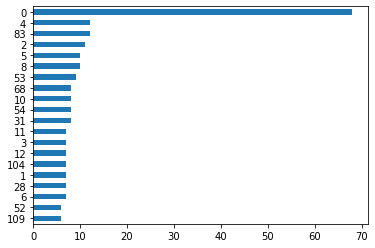

In [11]:
arch_df.cleaned_length.value_counts().head(20).sort_values().plot.barh()

# Visualizing the most common languages of the readme files

<AxesSubplot:>

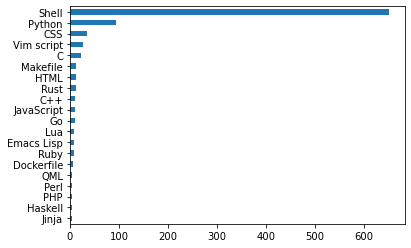

In [12]:
arch_df.language.value_counts().head(20).sort_values().plot.barh()

In [13]:
arch_df.language.dropna()

0       Shell
1       Shell
2       Shell
3      Python
4       Shell
        ...  
979      HTML
980      Ruby
981     Shell
982     Shell
983     Shell
Name: language, Length: 984, dtype: object

In [14]:
arch_df.language.value_counts(normalize=False).head(20).sort_values()

Jinja           4
Haskell         4
PHP             5
Perl            5
QML             5
Dockerfile      7
Ruby            9
Emacs Lisp      9
Lua             9
Go             10
JavaScript     10
C++            10
Rust           13
HTML           13
Makefile       13
C              23
Vim script     26
CSS            35
Python         94
Shell         650
Name: language, dtype: int64

In [15]:
arch_corpus_list = []
language = []
for entry in range(len(arch_df.readme_contents)):
    language.append(arch_df.language[entry])
    arch_corpus_list.extend(clean_data(arch_df.readme_contents[entry]))
arch_corpus = pd.Series(arch_corpus_list)
arch_corpus.describe()

count     245042
unique     26830
top       instal
freq        4202
dtype: object

# Inspecting and visualizing the most common words of cleaned readme files

In [16]:
arch_corpus.value_counts().sort_values(ascending=False).head(20)

instal      4202
use         3594
packag      2936
file        2331
run         1716
system      1482
configur    1433
script      1428
set         1281
build       1277
pacman      1268
user        1087
need         998
make         953
option       923
bash         905
creat        896
default      861
1            852
boot         829
dtype: int64

<AxesSubplot:>

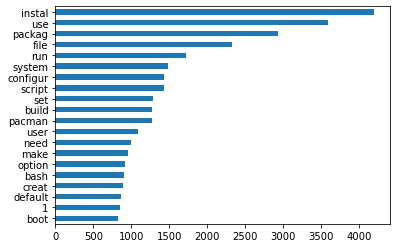

In [17]:
arch_corpus.value_counts().head(20).sort_values().plot.barh()

In [18]:
arch_corpus.nunique()

26830

# Inspecting and visualizing the most bigrams of cleaned readme files

In [19]:
top_20_arch_bigrams = (pd.Series(nltk.ngrams(arch_corpus, 2))
                      .value_counts()
                      .head(20))

In [20]:
top_20_arch_bigrams

(configur, file)       275
(instal, packag)       235
(packag, instal)       191
(aur, packag)          172
(make, sure)           165
(config, file)         156
(pacman, sr)           154
(sr, mnt)              154
(systemctl, enabl)     141
(instal, script)       135
(desktop, environ)     133
(sh, pacman)           131
(command, line)        127
(follow, command)      118
(clone, cd)            116
(docker, run)          108
(pacman, noconfirm)     97
(file, system)          96
(p, aligncent)          95
(run, script)           94
dtype: int64

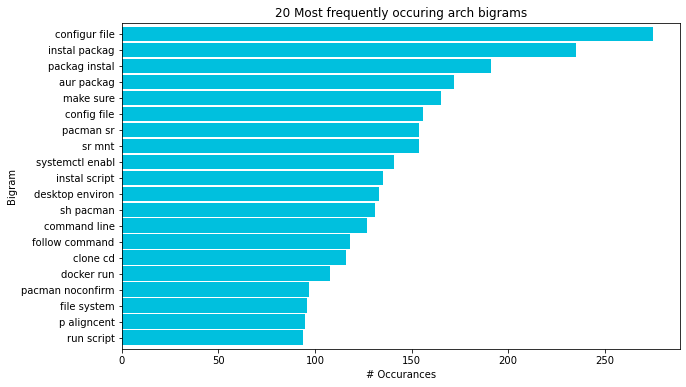

In [21]:
top_20_arch_bigrams.sort_values().plot.barh(color='#00C0DE', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring arch bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_arch_bigrams.reset_index().sort_index(ascending=False)['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


# Inspecting and visualizing the most trigrams of cleaned readme files

In [22]:
top_20_arch_trigrams = (pd.Series(nltk.ngrams(arch_corpus, 3)).value_counts().head(20))
top_20_arch_trigrams

(pacman, sr, mnt)                     154
(sh, pacman, noconfirm)                85
(v, etclocaltimeetclocaltimero, e)     60
(gnu, gener, public)                   54
(gener, public, licens)                53
(archlinuxcn, server, ini)             50
(00, 00, 00)                           36
(exampl, docker, run)                  34
(pleas, consid, buy)                   34
(umask000, e, puid0)                   33
(p, aligncent, src)                    33
(puid0, e, pgid0)                      33
(e, puid0, e)                          33
(e, umask000, e)                       33
(buy, beer, paypal)                    32
(consid, buy, beer)                    32
(beer, paypal, donat)                  32
(appreci, work, pleas)                 32
(work, pleas, consid)                  32
(paypal, donat, document)              31
dtype: int64

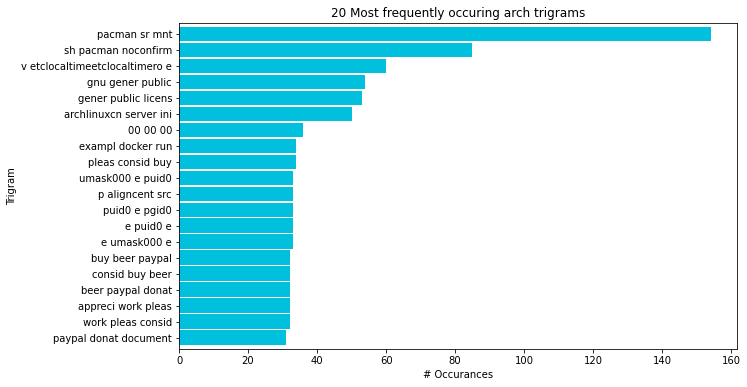

In [23]:
top_20_arch_trigrams.sort_values().plot.barh(color='#00C0DE', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring arch trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_arch_trigrams.reset_index().sort_index(ascending=False)['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)


# Inspecting and visualizing the most quadgrams of cleaned readme files

In [24]:
top_20_arch_quadgrams = (pd.Series(nltk.ngrams(arch_corpus, 4)).value_counts().head(20))
top_20_arch_quadgrams

(gnu, gener, public, licens)          50
(00, 00, 00, 00)                      34
(e, umask000, e, puid0)               33
(umask000, e, puid0, e)               33
(e, puid0, e, pgid0)                  33
(consid, buy, beer, paypal)           32
(pleas, consid, buy, beer)            32
(work, pleas, consid, buy)            32
(appreci, work, pleas, consid)        32
(buy, beer, paypal, donat)            32
(beer, paypal, donat, document)       31
(v, path, config, filesconfig)        28
(path, config, filesconfig, v)        28
(user, variabl, command, defin)       28
(___, appreci, work, pleas)           28
(pleas, replac, user, variabl)        28
(command, defin, correct, valu)       28
(replac, user, variabl, command)      28
(variabl, command, defin, correct)    28
(umaskumask, creat, file, e)          27
dtype: int64

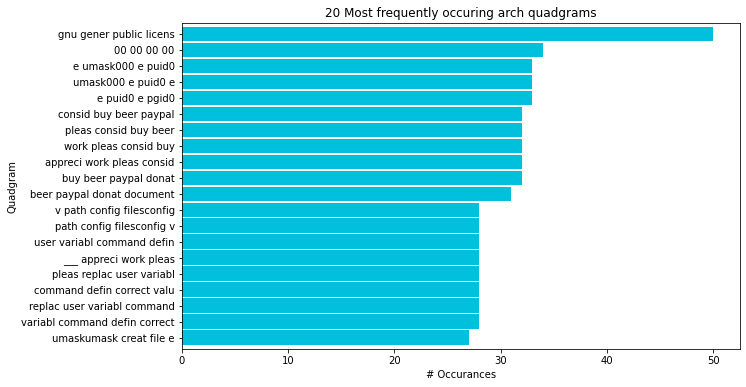

In [25]:
top_20_arch_quadgrams.sort_values().plot.barh(color='#00C0DE', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring arch quadgrams')
plt.ylabel('Quadgram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_arch_quadgrams.reset_index().sort_index(ascending=False)['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2] + ' ' + t[3])
_ = plt.yticks(ticks, labels)


# Exploring data grouped by language

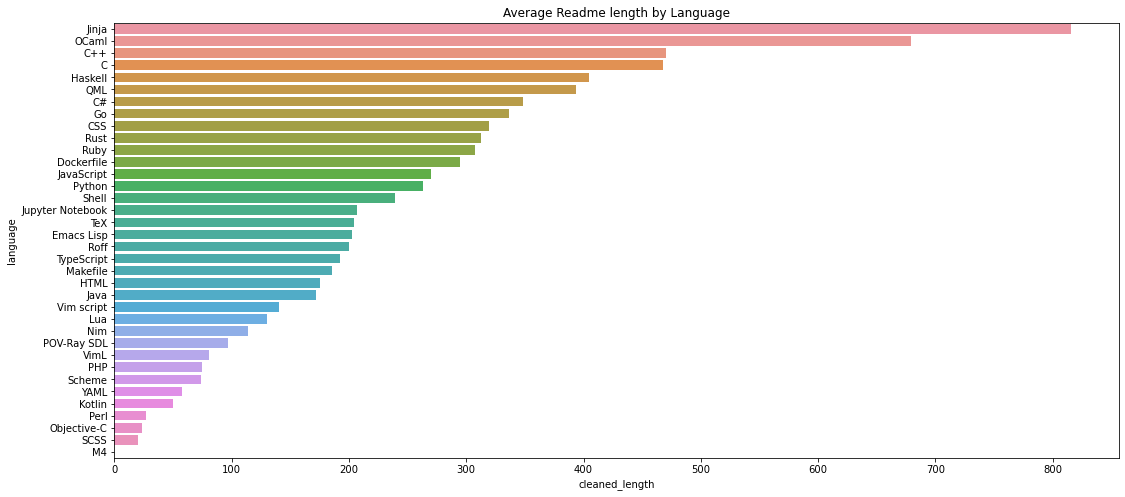

In [26]:
plt.figure(figsize=(18, 8))
sns.barplot(data = arch_df.groupby('language').mean().reset_index().sort_values('cleaned_length', ascending=False), x = 'cleaned_length', y='language')
plt.title('Average Readme length by Language')
plt.show()

In [27]:
arch_df.groupby('language').mean().reset_index().sort_values('cleaned_length', ascending=False)

,language,cleaned_length
11,Jinja,815.500000
18,OCaml,679.000000
2,C++,470.200000
0,C,467.347826
8,Haskell,404.750000
24,QML,393.400000
1,C#,348.000000
6,Go,336.400000
3,CSS,319.542857
27,Rust,312.307692


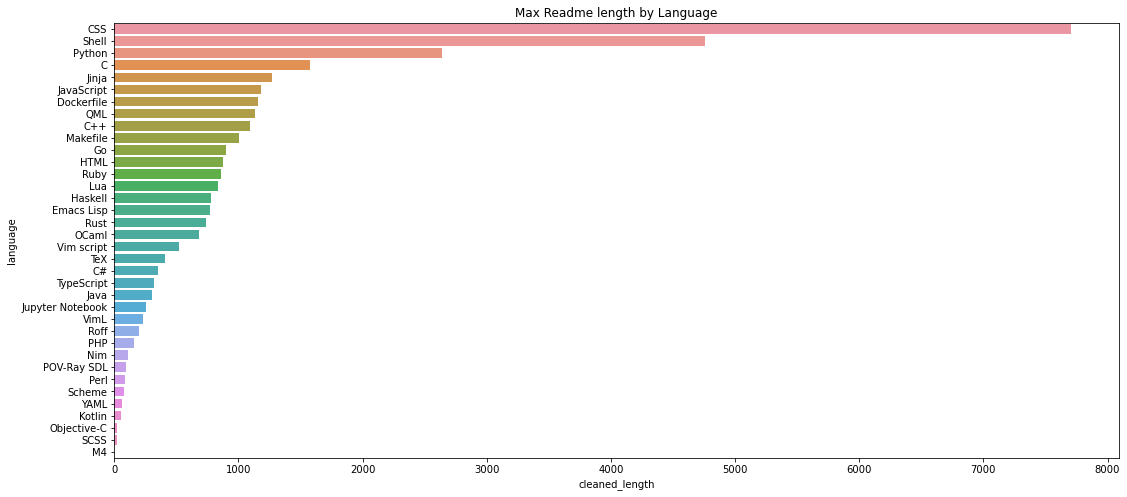

In [28]:
plt.figure(figsize=(18, 8))
sns.barplot(data = arch_df.groupby('language').max().reset_index().sort_values('cleaned_length', ascending=False), x = 'cleaned_length', y='language')
plt.title('Max Readme length by Language')
plt.show()

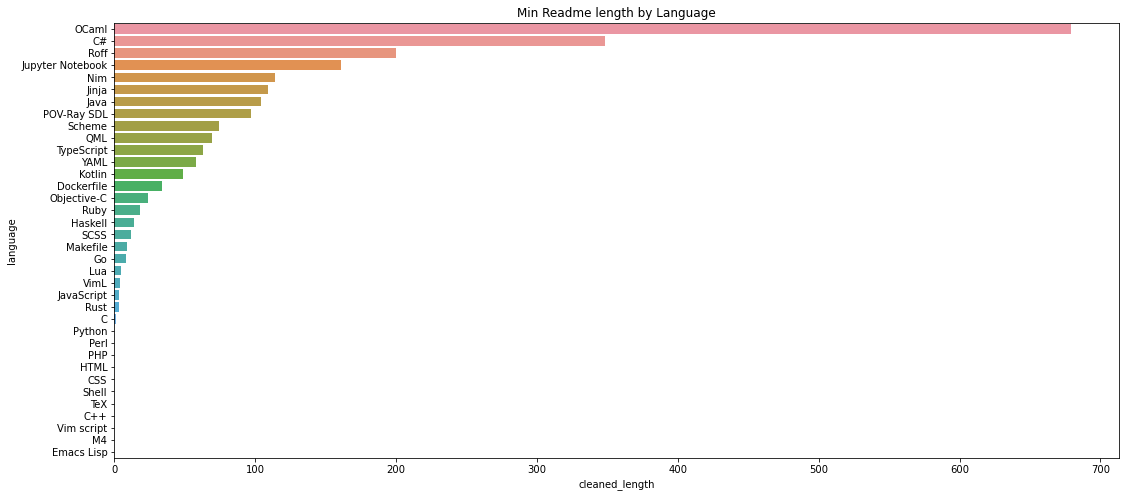

In [29]:
plt.figure(figsize=(18, 8))
sns.barplot(data = arch_df.groupby('language').min().reset_index().sort_values('cleaned_length', ascending=False), x = 'cleaned_length', y='language')
plt.title('Min Readme length by Language')
plt.show()

# Making new dataframes based on language

In [30]:
shell = arch_df.query('language == "Shell"').reset_index()
python = arch_df.query('language == "Python"').reset_index()
css = arch_df.query('language == "CSS"').reset_index()
other_lang = arch_df.query('language != "Shell" & language != "Python" & language != "CSS"').reset_index()

In [31]:
len(shell) + len(python) + len(css) + len(other_lang)

984

In [32]:
shell.head()

,index,repo,language,readme_contents,cleaned_readme,cleaned_length
0,0,ChrisTitusTech/ArchTitus,Shell,# ArchTitus Installer Script\n[![GitHub Super-...,"[archtitu, instal, script, github, superlint, ...",245
1,1,archlinuxcn/repo,Shell,Arch Linux Chinese Community Repository\n====\...,"[chines, commun, repositori, packag, consist, ...",72
2,2,MatMoul/archfi,Shell,# archfi\n\nJust a simple bash script wizard t...,"[archfi, simpl, bash, script, wizard, instal, ...",108
3,4,picodotdev/alis,Shell,# alis\n\n![Arch Linux](https://raw.githubuser...,"[ali, bash, instal, script, ali, also, known, ...",916
4,5,windelicato/dotfiles,Shell,Arch Linux configuration files for programs an...,"[configur, file, program, bspwm, requir, run, ...",57


In [33]:
shell_corpus_list = []
for entry in range(len(shell)):
    shell_corpus_list.extend(shell.cleaned_readme[entry])
shell_corpus = pd.Series(shell_corpus_list)
shell_corpus.describe()

count     155659
unique     18329
top       instal
freq        2825
dtype: object

In [34]:
python_corpus_list = []
for entry in range(len(python)):
    python_corpus_list.extend(python.cleaned_readme[entry])
python_corpus = pd.Series(python_corpus_list)
python_corpus.describe()

count      24711
unique      4281
top       instal
freq         468
dtype: object

In [35]:
css_corpus_list = []
for entry in range(len(css)):
    css_corpus_list.extend(css.cleaned_readme[entry])
css_corpus = pd.Series(css_corpus_list)
css_corpus.describe()

count     11184
unique     3215
top         use
freq        167
dtype: object

In [36]:
other_lang_corpus_list = []
for entry in range(len(other_lang)):
    other_lang_corpus_list.extend(other_lang.cleaned_readme[entry])
other_lang_corpus = pd.Series(other_lang_corpus_list)
other_lang_corpus.describe()

count      53488
unique      8420
top       instal
freq         813
dtype: object

In [37]:
shell_freq = pd.Series(shell_corpus).value_counts()
python_freq = pd.Series(python_corpus).value_counts()
css_freq = pd.Series(css_corpus).value_counts()
other_lang_freq = pd.Series(other_lang_corpus).value_counts()